# 

# Newton’s method

We get started by loading our package that brings in plotting and other
features, including those provided by the `Roots` package:

In [1]:
using MTH229
using Plots
plotly()

------------------------------------------------------------------------

### Quick background

Read about this material here: [Newton’s
Method](http://mth229.github.io/newton.html).

Symbolic math — as is done behind the scenes at the Wolfram alpha web
site — is pretty nice. For so many problems it can easily do what is
tedious work. However, for some questions, only numeric solutions are
possible. For example, there is no general formula to solve a fifth
order polynomial the way there is a quadratic formula for solving
quadratic polynomials. Even an innocuous polynomial like
$f(x) = x^5 - x - 1$ has no easy algebraic solution for is one root.

A graph shows what looks like just one answer **between** $1$ and $2$,
closer to $1$


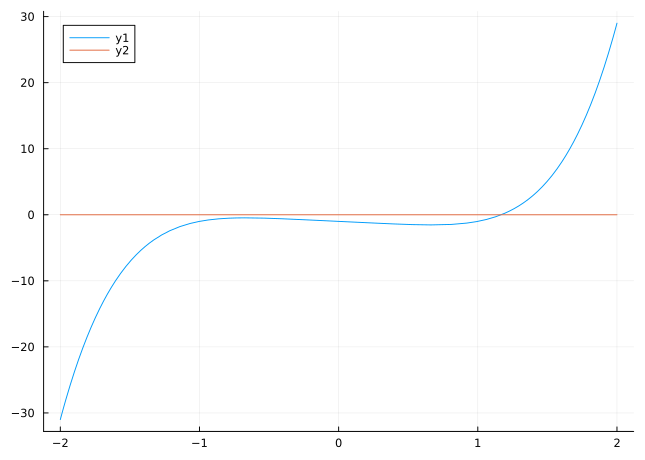

In [3]:
f(x) = x^5 - x - 1
plot(f, -2, 2)
plot!(zero, -2, 2)

From this, we can call the bisection method to identify the value:

In [4]:
fzero(f, 1, 2)

1.1673039782614187

We’ve seen the bisection method previously to find a root, but this is
somewhat cumbersome to use as it needs a
[bracketing](https://en.wikipedia.org/wiki/Bisection_method#The_method)
interval to begin. Moreover, bisection can be computationally slow (by
comparison).

Here we discuss Newton’s method. Like the bisection method it is an
*iterative algorithm*. However instead of identifying a bracketing
interval, we only need to identify a **nearby** *initial* guess, $x_0$.

Starting with $x_0$ the algorithm to produce $x_1$ is easy to describe:

-   form the tangent line at $(x_0, f(x_0))$.

-   let $x_1$ be the intersection point of this tangent line with the
    $x$ axis.

If we can go from $x_0$ to $x_1$ we can repeat the update step to get
$x_2$ and then $x_3$, …

Graphically, this figure illustrates the process until the guesses get
so close they crowd the figure. (Ignore the code to produce the figure.)


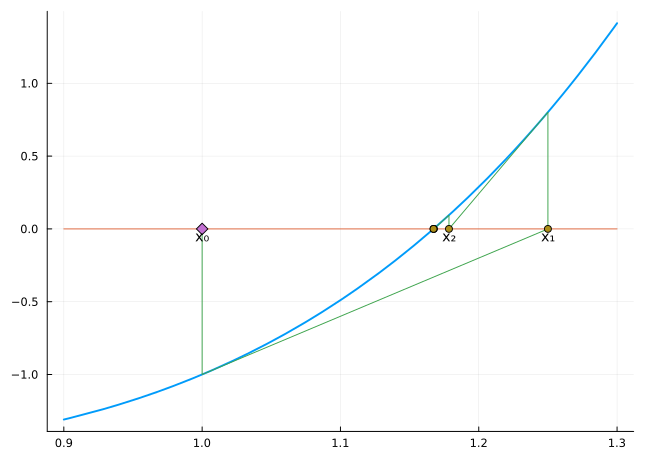

In [5]:
f(x) = x^5 - x - 1
plot(f, 0.9, 1.3; legend=false, linewidth=2)
plot!(zero)
newton_plot!(f, 1.0; annotate_steps=3)

In the figure, the sequence of guesses can be seen, basically $x_0=1$,
$x_1=1.25$, $x_2=1.178\dots$, …, $1.16730\dots$.

To find these values numerically, we first need an algebraic
representation. For this problem, we can describe the tangent line’s
slope by *either* $f'(x_0)$ *or* by using “rise over run”:

$$
f'(x_0) = \frac{f(x_0) - 0}{x_0 - x_1}.
$$

Solving for $x_1$, this yields the update formula:

$$
x_1 = x_0 - f(x_0) / f'(x_0).
$$

That is, the new guess shifts the old guess by an increment
$f(x_0)/f'(x_0)$.

In `Julia`, we can do one step with:

In [6]:
f(x) = x^5 - x - 1
x = 1
x = x - f(x) / f'(x)

1.25

(We don’t use indexing, but rather update our binding for the `x`
variable.)

Is `x` close to being the zero? We don’t know the actual zero — we are
trying to approximate it — but we do know the function’s value at the
actual zero. For this new guess the function value is

In [7]:
f(x)

0.8017578125

This is much closer to $0$ than $f(1)$, the value at our initial guess,
but not nearly as close as we can get using Newton’s method. We just
need to **iterate** — run a few more steps.

We do another step just by running the last line. For example, we run 5
more steps by copying and pasting the same expression:

In [8]:
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)

1.1673039782614187

The value of `x` updates. But is it getting closer to a *zero*? If so,
then $f(x)$ should be close to zero. We can see both values with:

In [9]:
x, f(x)

(1.1673039782614187, 6.661338147750939e-16)

This shows $f(x)$ is not exactly $0.0$ but it is as close as we can get.
Repeating the algorithm does not change the value of `x`. (On a
computer, floating point issues creep in when values are close to 0, and
these prevent values being mathematically exact.) As we can’t improve,
we stop. Our value of `x` is an *approximate* zero and `f(x)` is within
machine tolerance of being `0`.

How do we know how to stop? When the algorithm works, we will stop when
the `x` value *basically* stops updating, as `f(x)` is basically `0`.
However, the algorithm need not work, so any implementation must keep
track of how many steps are taken and should also stop when this gets
out of hand.

For convenience, the `newton` function in the `MTH229` package (using
the `Roots` package) will iterate until convergence. If we pass in the
optional argument `verbose=true` we will see the sequence of steps.

For example, for $f(x) = x^3 - 2x - 5$, a function that Newton himself
considered, a solution near $2$, is found with:

In [10]:
x = 2
f(x) = x^3 - 2x -5
xstar = newton(f, 2)

2.0945514815423265

We can see the approximate zero and the function value, as follows:

In [11]:
xstar, f(xstar)

(2.0945514815423265, -8.881784197001252e-16)

------------------------------------------------------------------------

### Using fzero from the Roots package

As mentioned, the `newton` function in the `Roots` package implements
Newton’s method. The `Roots` package also provides the `fzero` function
for finding roots. This function will:

-   use bisection when called as `fzero(f, a, b)` with the zero
    **between** the bracketing interval `[a,b]`
-   use a method like Newton’s method when called as `fzero(f, c)` with
    the zero **near** `c`.

For example:

In [12]:
fzero(sin, 3)   # start with initial guess of 3, returns 3.141592653589793

3.141592653589793

The utility of this function is that it does not require a derivative to
be taken and it is a little less sensitive than Newton’s method to the
initial guess. The use of `fzero` is recommended: just plot to find a
nearby guess and use `fzero(f,c)` to improve this guess.

### When Newton’s method fails

The error in the $n$th step using Newton’s method at a simple zero
follows a formula: $|e_{n+1}| \leq (1/2) |f''(a)/f'(b)| \cdot |e_n|^2$,
for some $a$ and $b$. Generally this ensures that the error at step
$n+1$ is smaller than the error at step $n$ squared. But this can fail
due to various cases:

-   the initial guess is not *near* the zero,

-   the derivative, $|f'(x)|$, is too small, or

-   the second derivative, $|f''(x)|$, is too big, or possibly
    undefined.

### Quadratic convergence

When Newton’s method converges to a *simple zero* it is said to have
*quadratic convergence*. A simple zero is one with multiplicity 1 and
quadratic convergence says basically that the error at the $i+1$st step
is like the error for $i$th step squared. In particular, if the error is
like $10^{-3}$ on one step, it will be like $10^{-6}$, then $10^{-12}$
then $10^{-24}$ on subsequent steps. (Which is typically beyond the
limit of a floating point approximation.) This is why one can *usually*
take just 5, or so, steps to get to an answer.

Not so for multiple roots and some simple roots.

------------------------------------------------------------------------

In [13]:
#  Your commands go here